In [15]:
#Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [16]:
# Load dataset
df = pd.read_csv('timeseries_testv4.csv')
df.head()

,Year,Waitlist,Diabetes,Obesity,Overdose,Pct_O,Total_Adj
0,12/31/1995,17257,4.98,15.0,0.0055,0.477256,17065
1,12/31/1996,17732,5.23,15.0,0.0055,0.482348,17519
2,12/31/1997,18405,5.52,16.0,0.0057,0.481500,18173
3,12/31/1998,19473,5.80,17.0,0.0059,0.482668,19226
4,12/31/1999,21835,6.09,18.0,0.0061,0.480009,21566


In [17]:
#Assign variables for regression
X = df[['Diabetes','Obesity','Overdose','Pct_O']]
y = df['Total_Adj'].values.reshape(-1,1)
print(X.shape, y.shape)

(25, 4) (25, 1)


In [18]:
#Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [19]:
#Create model
model = LinearRegression()

In [20]:
#fit the model to the training data and calculate the scores for the training and testing data
#Begin
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
#End
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")


Training Score: 0.9821145469069239
Testing Score: 0.9536959965556826


Text(0.5, 1.0, 'Residual Plot')

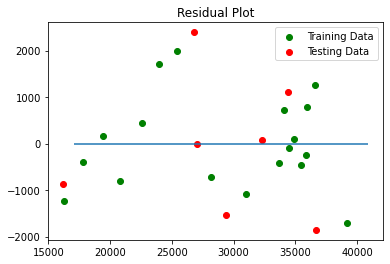

In [21]:
#Plot Residuals for Training and Testing Data
#Begin
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="green", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
#End